In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
plt.style.use('seaborn-notebook')
plt.style.use('ggplot')

# 7.1 regression predictors

In [3]:
hibbs = pd.read_csv('../ROS-Examples/ElectionsEconomy/data/hibbs.dat', sep=' ')

In [4]:
hibbs.head()

,year,growth,vote,inc_party_candidate,other_candidate
0,1952,2.40,44.60,Stevenson,Eisenhower
1,1956,2.89,57.76,Eisenhower,Stevenson
2,1960,0.85,49.91,Nixon,Kennedy
3,1964,4.21,61.34,Johnson,Goldwater
4,1968,3.02,49.60,Humphrey,Nixon


If the regression has used growth in average personal income without adjusting for inflation, then the average personal income will have an additional relationship with the year (i.e. income increases with year due to inflation, which increases at an exponential rate). But since we are talking about growth, the change would go from $x-x_0$ to $x*(1+inflation) - x_0$ where the $x_0$ is the previous year. This adds an additional $inflation*x$ to the growth. 


The regression line right now is $y = a_0x+b_0$ where $x$ is the growth adjusted for inflation (sorry for thet notation issue). It will now be $y = a_1(x*(1+inflation))+b_1$ So the slope will change, as $a_0 = a_1(1+inflation)$. 

# 7.2 Fake-data simulation and regression

In [11]:
def sim_fake(a,b):
    x = np.random.uniform(0,50,100)
    error = np.random.normal(0, 3, 100)
    return x, a+b*x+error

In [12]:
x,y = sim_fake(5,7)

In [13]:
x_sm = sm.add_constant(x)

In [14]:
res = sm.GLM(y, x_sm).fit()

In [15]:
res.params

array([4.82770323, 6.98624165])

In [16]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          6.6304
Method:                          IRLS   Log-Likelihood:                -235.47
Date:                Thu, 20 May 2021   Deviance:                       649.78
Time:                        09:59:37   Pearson chi2:                     650.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8277      0.503      9.604      0.000       3.843       5.813
x1             6.9862      0.017    399.332      0.000       6.952       7.021
==============================================================================
"""

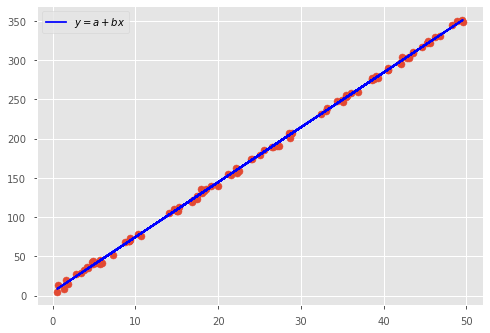

In [26]:
plt.scatter(x,y)
plt.plot(x, res.params[0]+res.params[1]*x, color='b', label = r"$y = a+bx$")
plt.legend()

# 7.3 Fake-data simulation and fitting the wrong model

In [28]:
def sim_fake2(a,b,c):
    x = np.random.uniform(0,50,100)
    error = np.random.normal(0, 3, 100)
    return x, a+b*x++c*np.power(x,2)+error

In [29]:
x2, y2 = sim_fake2(5,7,9)

In [30]:
x_sm2 = sm.add_constant(x2)

In [31]:
res2 = sm.GLM(y2, x_sm2).fit()

In [33]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                      2.7947e+06
Method:                          IRLS   Log-Likelihood:                -883.05
Date:                Thu, 20 May 2021   Deviance:                   2.7388e+08
Time:                        12:57:01   Pearson chi2:                 2.74e+08
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4346.4610    343.780    -12.643      0.000   -5020.258   -3672.664
x1           481.6391     11.488     41.924      0.000     459.122     504.156
==============================================================================
"""

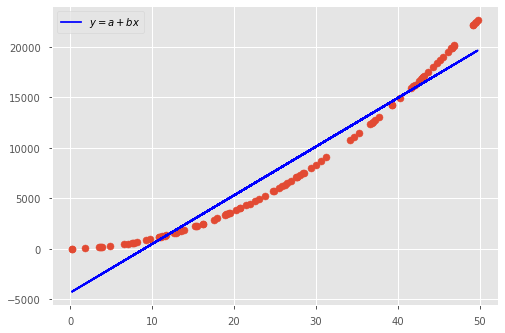

In [35]:
plt.scatter(x2,y2)
plt.plot(x2, res2.params[0]+res2.params[1]*x2, color='b', label = r"$y = a+bx$")
plt.legend()

Best fit in the sense that the mean-error square is minimized with the constrait of y=a+b*x

# 7.4 Prediction

skipped for having to find new data

# 7.5 Convergence as sample size increases

In [36]:
def sim_fake_n(a,b, n):
    x = np.random.uniform(0,50,n)
    error = np.random.normal(0, 3, n)
    x_sm = sm.add_constant(x)
    y = a+b*x+error
    res = sm.GLM(y, x_sm).fit()
    return x, y, res

In [37]:
n_list =  [10, 30, 100, 300, 1000, 3000, 10000, 30000]
results = []
x_list= []
y_list = []
for n in n_list:
    x,y,res = sim_fake_n(5,7,n)
    results.append(res)
    x_list.append(x)
    y_list.append(y)

Text(0, 0.5, 'constant bse')

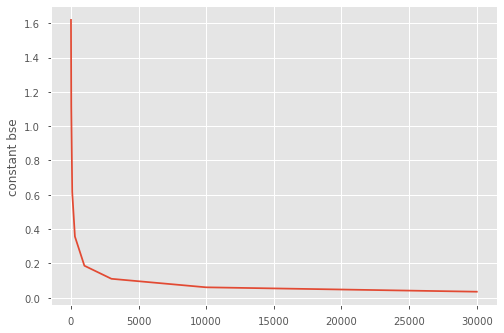

In [41]:
plt.plot(n_list, [x.bse[0] for x in results])
plt.ylabel('constant bse')

Text(0, 0.5, 'constant')

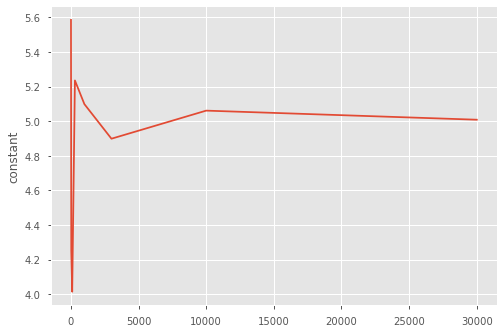

In [44]:
plt.plot(n_list, [x.params[0] for x in results])
plt.ylabel('constant')

Text(0, 0.5, 'slope bse')

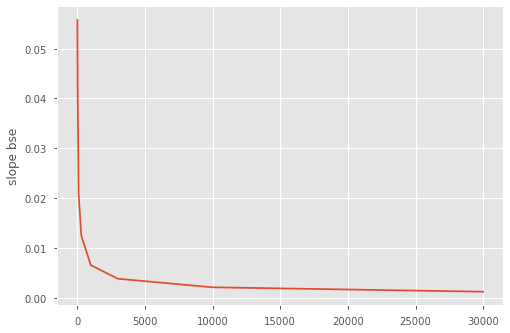

In [42]:
plt.plot(n_list, [x.bse[1] for x in results])
plt.ylabel('slope bse')

Text(0, 0.5, 'slope')

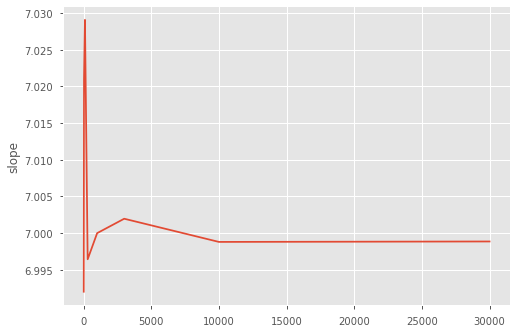

In [43]:
plt.plot(n_list, [x.params[1] for x in results])
plt.ylabel('slope')

# 7.6 Formulating comparisons as regression models

In [45]:
hibbs['binary_prediction'] = np.where(hibbs['growth']>2, 1, 0)

In [47]:
hibbs

,year,growth,vote,inc_party_candidate,other_candidate,binary_prediction
0,1952,2.40,44.60,Stevenson,Eisenhower,1
1,1956,2.89,57.76,Eisenhower,Stevenson,1
2,1960,0.85,49.91,Nixon,Kennedy,0
3,1964,4.21,61.34,Johnson,Goldwater,1
4,1968,3.02,49.60,Humphrey,Nixon,1
5,1972,3.62,61.79,Nixon,McGovern,1
6,1976,1.08,48.95,Ford,Carter,0
7,1980,-0.39,44.70,Carter,Reagan,0
8,1984,3.86,59.17,Reagan,Mondale,1
9,1988,2.27,53.94,"Bush, Sr.",Dukakis,1


In [48]:
binary_1_votes = hibbs.query('binary_prediction == 1')['vote'].mean()

In [49]:
binary_0_votes = hibbs.query('binary_prediction == 0')['vote'].mean()

In [52]:
mean_diff = binary_1_votes-binary_0_votes
mean_diff

5.5075

In [53]:
binary_1_group = hibbs.query('binary_prediction == 1')
binary_0_group = hibbs.query('binary_prediction == 0')

In [54]:
perc_1 = len(binary_1_group)/len(hibbs)
perc_0 = len(binary_0_group)/len(hibbs)

In [55]:
perc_1

0.5

In [56]:
perc_0

0.5

In [57]:
hibbs['binary_prediction'].sum()

8

In [58]:
len(hibbs)

16

In [84]:
err1 = binary_1_group['vote'].std()/np.sqrt(8)
err2 = binary_0_group['vote'].std()/np.sqrt(8)

In [85]:
err1

2.203204190572708

In [86]:
err2

1.1858141228407475

In [88]:
standard_err = np.sqrt(np.power(err1,2)+np.power(err2,2))
standard_err

2.5020519257772635

In [69]:
res_vote = smf.glm('vote ~ binary_prediction', data = hibbs).fit()

In [70]:
res_vote.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   vote   No. Observations:                   16
Model:                            GLM   Df Residuals:                       14
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          25.041
Method:                          IRLS   Log-Likelihood:                -47.399
Date:                Thu, 20 May 2021   Deviance:                       350.57
Time:                        13:15:01   Pearson chi2:                     351.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            49.3013      1.769     27.866      0.000      45.834      52.769
binary_prediction     5.5075      2.502      2.201      0.028       0.604      10.411
=====================================================================================
"""

matches

# 7.7 Comparing simulated data to assumed parameter values

In [89]:
def sim_fake_n2(a, b, n):
    x = np.random.uniform(0,20,n)
    error = np.random.normal(0, 5, n)
    x_sm = sm.add_constant(x)
    y = a+b*x+error
    res = sm.GLM(y, x_sm).fit()
    return x, y, res

In [93]:
x3,y3, res3 = sim_fake_n2(2,3,100)

In [94]:
fake = pd.DataFrame({'x':x3, 'y':y3})

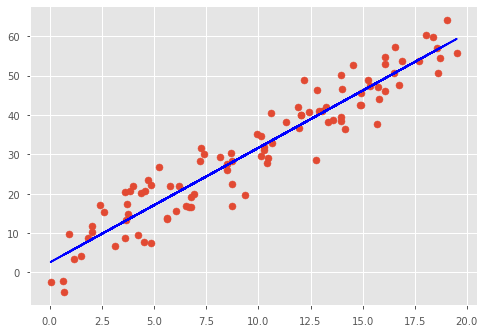

In [96]:
plt.scatter(x3,y3)
plt.plot(x3, res3.params[0]+res3.params[1]*x3, color='b', label = r"$y = a+bx$")


In [97]:
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          26.303
Method:                          IRLS   Log-Likelihood:                -304.37
Date:                Thu, 20 May 2021   Deviance:                       2577.7
Time:                        13:26:57   Pearson chi2:                 2.58e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5418      1.070      2.376      0.017       0.445       4.638
x1             2.9089      0.096     30.224      0.000       2.720       3.098
==============================================================================
"""

reasonably close as in within the 2sigma (i.e. within the 95%)

# 7.8 Sampling distribution

In [102]:
results_list = []
for n in range(0, 1000):
    x3,y3, res3 = sim_fake_n2(2,3,1000)
    results_list.append(res3)

In [124]:
constant_est = []
constant_err = []
slope_est = []
slope_err = []
for res in results_list:
    constant_est.append(res.params[0])
    constant_err.append(res.bse[0])
    slope_est.append(res.params[1])
    slope_err.append(res.bse[1])

In [125]:
np.mean(constant_est)

1.9965856489742386

In [126]:
np.std(constant_est)

0.31256439101917854

In [127]:
np.mean(constant_err)

0.31639699101136093

In [128]:
np.mean(slope_est)

3.000017709241963

In [129]:
np.std(slope_est)

0.026589768786916396

In [130]:
np.mean(slope_err)

0.027392386808505188

So std(coeff) is essentially the same as mean(std_from_fit)

In [133]:
df = pd.DataFrame({'constant_est': constant_est, 'constant_err':constant_err, 'slope_est':slope_est, 'slope_err': slope_err})

In [134]:
df

,constant_est,constant_err,slope_est,slope_err
0,2.160772,0.314232,2.999090,0.026973
1,2.087677,0.330693,2.979799,0.028562
2,1.744005,0.312022,3.000712,0.027546
3,2.003548,0.308387,2.997387,0.026756
4,1.363743,0.311054,3.034178,0.026841
...,...,...,...,...
995,2.183678,0.315475,2.985853,0.027544
996,1.497771,0.319741,3.059502,0.027361
997,2.486326,0.309314,2.975518,0.026852
998,2.235891,0.337048,2.998224,0.028768


In [136]:
df['constant_within_2_sigma'] = np.where(np.abs(df['constant_est']-2)<2*df['constant_err'], 1,0)

In [137]:
df['slope_within_2_sigma'] = np.where(np.abs(df['slope_est']-3)<2*df['slope_err'], 1,0)

In [138]:
df['constant_within_2_sigma'].sum()/1000

0.954

In [139]:
df['slope_within_2_sigma'].sum()/1000

0.957

# 7.9 interpretations of regressions 

If we just did an inverse of Sec 7.1 i.e.

In [142]:
res_inverse = smf.glm('growth~vote', data = hibbs).fit()

In [144]:
res_inverse.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 growth   No. Observations:                   16
Model:                            GLM   Df Residuals:                       14
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.87671
Method:                          IRLS   Log-Likelihood:                -20.582
Date:                Thu, 20 May 2021   Deviance:                       12.274
Time:                        13:44:31   Pearson chi2:                     12.3
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.9648      2.256     -3.531      0.000     -12.386      -3.543
vote           0.1895      0.043      4.396      0.000       0.105       0.274
==============================================================================
"""

We would have said that the growth is driven by the increase of vote share by the incumbent. That is simply not true. Since this is the inverse, it is reasonable to also say that there is no _causal_ relationship between the two variables, but they are simply _correlated_.